# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import os
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import requests
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy library to determine the cities based on latitude and longitude
#https://datatofish.com/how-to-install-python-package-in-anaconda/
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # used activity 6.2.4 04-Stu_BurundiWeatherApp
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # used activity 6.2.4 04-Stu_BurundiWeatherApp
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lapai
Processing Record 2 of Set 1 | mogadishu
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | tateyama
Processing Record 8 of Set 1 | tres palos
Processing Record 9 of Set 1 | pasuquin
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | zaozersk
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | kingston
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | san andros
City not found. Skipping...
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | car

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [124]:
#display Date in the dataframe in a readable format 
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"])


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lapai,9.0500,6.5667,36.35,40,96,1.17,NG,2023-06-04 15:08:31
1,mogadishu,2.0371,45.3438,27.93,89,75,5.66,SO,2023-06-04 15:03:38
2,yellowknife,62.4560,-114.3525,17.29,67,40,4.12,CA,2023-06-04 15:04:14
3,naze,28.3667,129.4833,21.12,72,16,2.28,JP,2023-06-04 15:07:29
4,tiksi,71.6872,128.8694,1.27,96,100,2.25,RU,2023-06-04 15:08:31


In [118]:
# Export the City_Data into a csv
output_path = os.path.join("..", "output_data", "cities.csv")
city_data_df.to_csv(output_path, index_label="City_ID")

In [119]:
# Read saved data
city_data_df = pd.read_csv(output_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lapai,9.0500,6.5667,36.35,40,96,1.17,NG,2023-06-04 15:08:31
1,mogadishu,2.0371,45.3438,27.93,89,75,5.66,SO,2023-06-04 15:03:38
2,yellowknife,62.4560,-114.3525,17.29,67,40,4.12,CA,2023-06-04 15:04:14
3,naze,28.3667,129.4833,21.12,72,16,2.28,JP,2023-06-04 15:07:29
4,tiksi,71.6872,128.8694,1.27,96,100,2.25,RU,2023-06-04 15:08:31


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

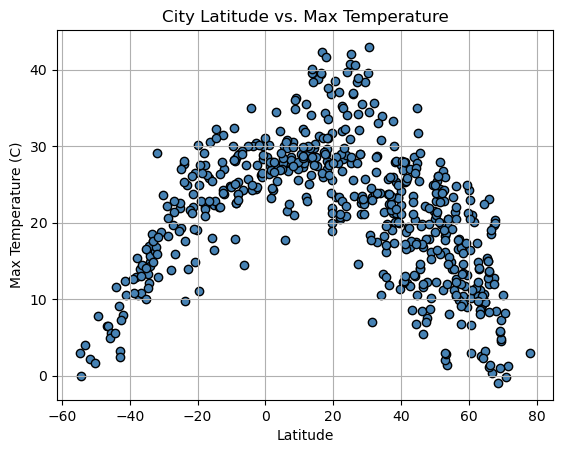

In [113]:
# Build scatter plot for latitude vs. temperature
#source: 6-2-5 Ins_OpenWeatherDataFrame
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig = os.path.join("..", "output_data","Fig1.png")
plt.savefig(output_fig)

# Show plot
plt.show()

#### Latitude Vs. Humidity

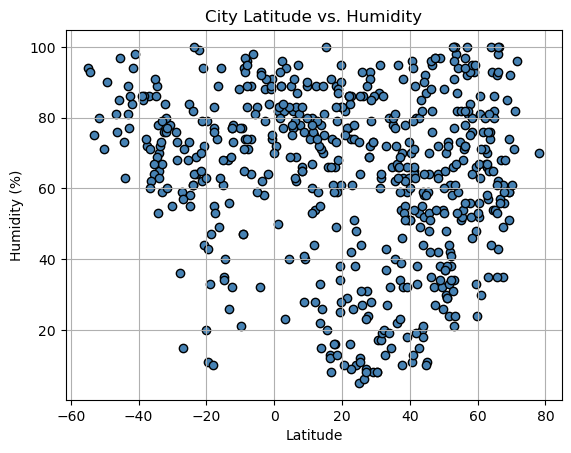

In [114]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig2 = os.path.join("..", "output_data","Fig2.png")
plt.savefig(output_fig2)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

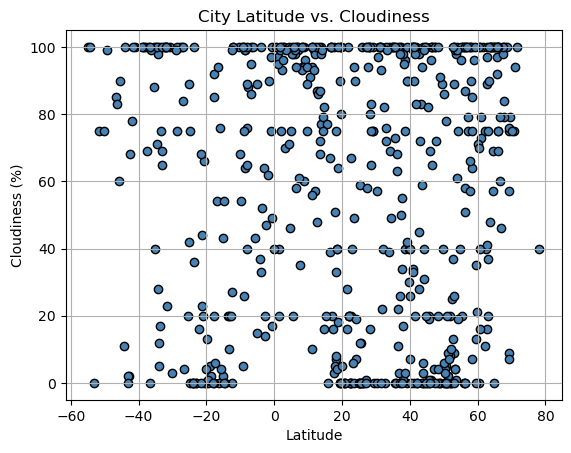

In [115]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig3 = os.path.join("..", "output_data","Fig3.png")
plt.savefig(output_fig3)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

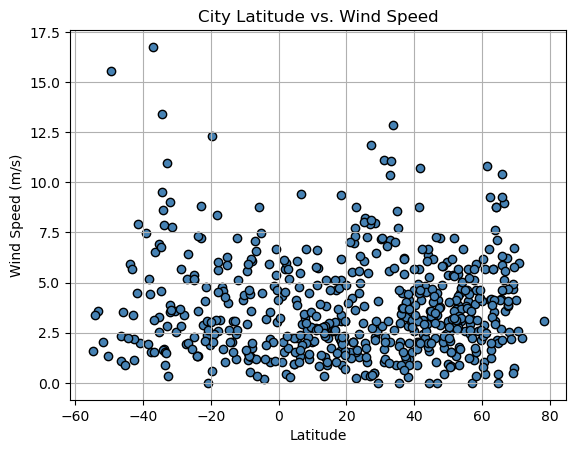

In [116]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig4 = os.path.join("..", "output_data","Fig4.png")
plt.savefig(output_fig4)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots:
#Source asked ChatGPT on how to define the function for linear regaression 
#that coul be used for multiple plots 
# Tutorial on "def": https://www.programiz.com/python-programming/function#:~:text=The%20syntax%20to%20declare%20a%20function%20is%3A%20def,return%20%28optional%29%20-%20returns%20value%20from%20a%20function
#Couldn't figure out which arguments to define - started from x_values and y_values and added 
#additional ones until it worked 
def lregression(x_values, y_values, slope, intercept):
        
        # Run regression on hemisphere weather data
        # source: Class actity 6.2.7 Stu_Weather_Stats 
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        # Set y axis
        # based on the initail error after plugging in y_value in the function
        #ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
        #couldn't figure out how to pull the changing header so I opted to pull that setting 
        #from this definition

        # Label x axis
        plt.xlabel('Latitude')
        
        # Print r square value
        print(f"The r-squared is: {rvalue**2}")
        
        #Annotate the text for the line equation with the coordinates of the point chnaning the values in the tuple
        #sources: plt.annotate function explanation: https://www.binarystudy.com/2023/05/how-to-show-point-coordinates-in-plot.html#:~:text=You%20can%20call%20the%20annotate%20%28%29%20function%20on,%281%2C%204%29%2C%20xytext%3D%20%281.5%2C%204.5%29%2C%20arrowprops%3Ddict%20%28facecolor%3D%27black%27%2C%20shrink%3D0.05%29%2C
        #Chat GPT search on Annotate the text for the line equation with the coordinates of the point chnaning the values in the tuple
        #to get the location of the annotation stay constant across the regression graphs. 
        plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

        #Show plot
        plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lapai,9.0500,6.5667,36.35,40,96,1.17,NG,1685891311
1,mogadishu,2.0371,45.3438,27.93,89,75,5.66,SO,1685891018
2,yellowknife,62.4560,-114.3525,17.29,67,40,4.12,CA,1685891054
3,naze,28.3667,129.4833,21.12,72,16,2.28,JP,1685891249
4,tiksi,71.6872,128.8694,1.27,96,100,2.25,RU,1685891311


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,waitangi,-43.9535,-176.5597,11.57,63,100,5.93,NZ,1685891311
9,ushuaia,-54.8000,-68.3000,3.02,94,100,1.61,AR,1685891312
14,port-aux-francais,-49.3500,70.2167,7.86,90,99,15.57,TF,1685891313
15,papatowai,-46.5619,169.4708,6.44,81,85,2.35,NZ,1685891313
19,puerto natales,-51.7236,-72.4875,2.25,80,75,2.06,CL,1685891136


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5021515173169804


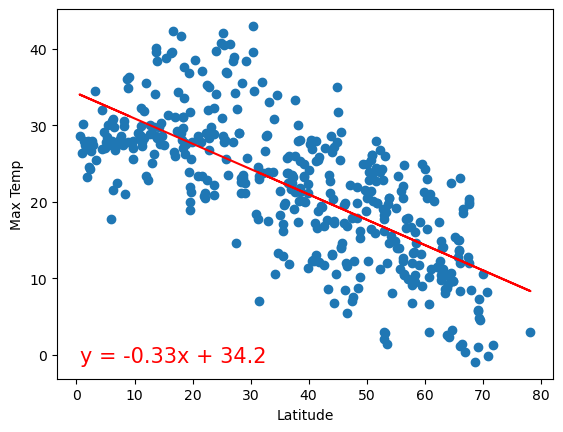

In [112]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
lregression(x_values, y_values, '', (10,40))

The r-squared is: 0.7271314232175797


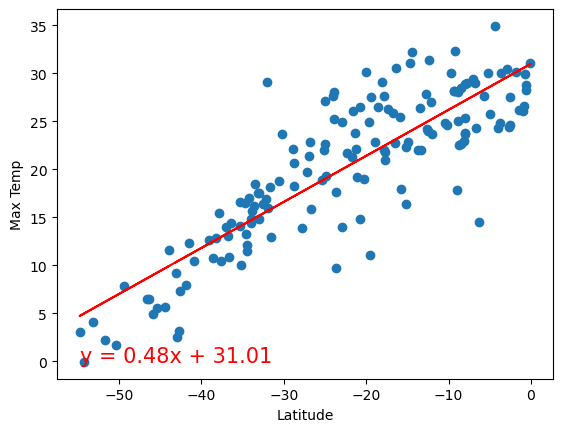

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
lregression(x_values, y_values, '', (-50,90))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0005136770418926446


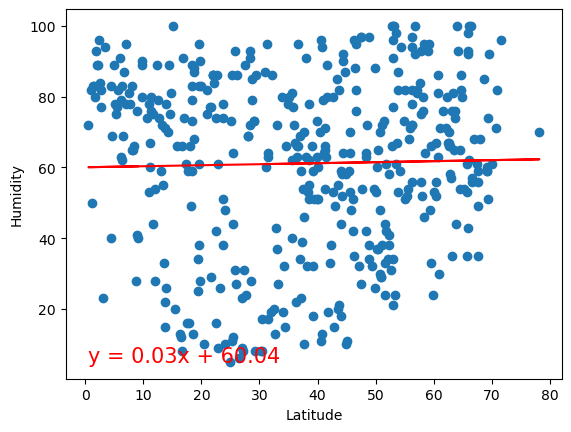

In [102]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel('Humidity')
lregression(x_values, y_values, '', (40,10)) 


The r-squared is: 0.013645748122517154


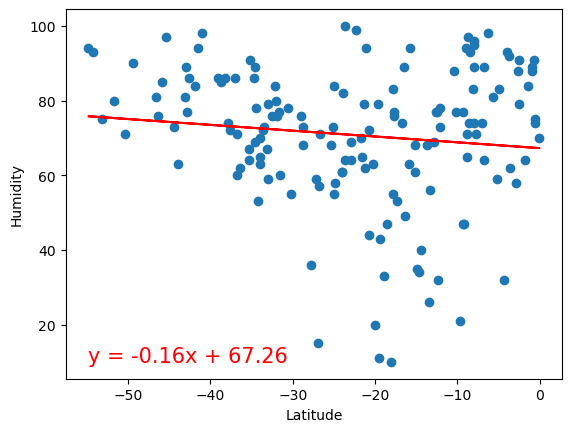

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel('Humidity')
lregression(x_values, y_values, '', (-50,15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0040665402335333225


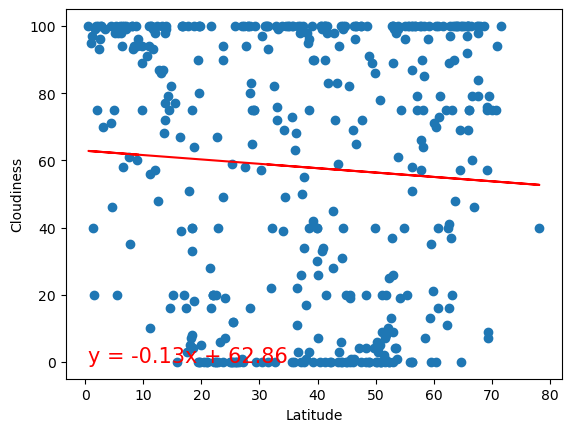

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel('Cloudiness')
lregression(x_values, y_values, '', (40,10))


The r-squared is: 0.01673217352986137


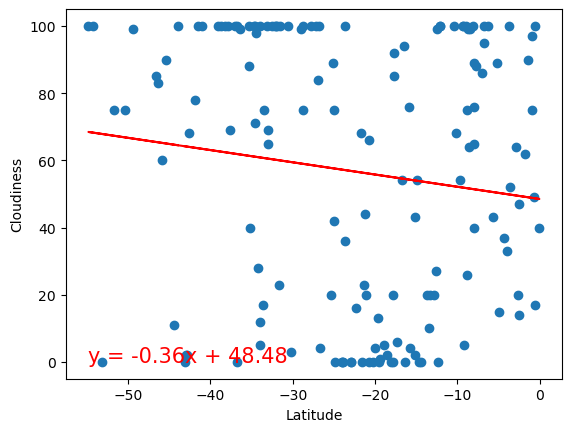

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel('Cloudiness')
lregression(x_values, y_values, '', (-50,60))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.012409757566457357


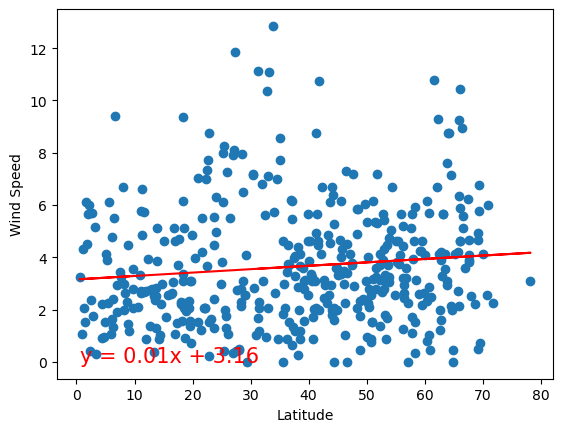

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed')
lregression(x_values, y_values, '', (40,35))

The r-squared is: 0.012133921936724003


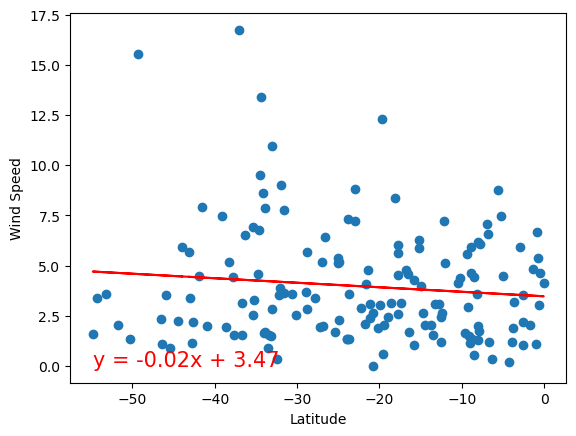

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed')
lregression(x_values, y_values, '', (-50,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE